<a href="https://colab.research.google.com/github/tobiasfernandes/Avaliacao_turbina_eolica/blob/main/Notebooks/Avaliacao_turbina_eolica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from decimal import Decimal

In [ ]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)','Direção do Vento(°)']
# del turbina['Direção do Vento(°)']
turbina['Data/hora']= pd.to_datetime(turbina['Data/hora'])
turbina['DV_Rounded(°)'] = round(turbina['Direção do Vento(°)']) #arredondar direção do vento
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),Direção do Vento(°),DV_Rounded(°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,260.0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,269.0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,273.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,271.0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,266.0
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,81.0
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,84.0
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,85.0
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,84.0


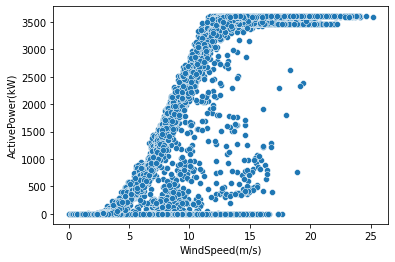

In [ ]:
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)')

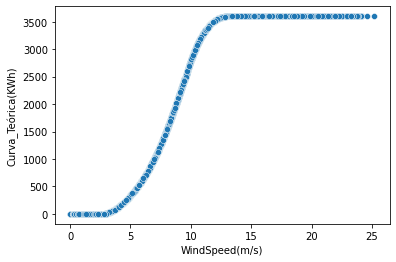

In [ ]:
#Curva Teórica
graf = sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Curva_Teórica(KWh)')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pot_real = turbina['ActivePower(kW)'].tolist()
pot_teorica = turbina['Curva_Teórica(KWh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []
offset = 10

for potencia in pot_teorica:
  pot_max.append(potencia*(1+(offset/100)))
  pot_min.append(potencia*(1-(offset/100)))
  # pot_min.append(potencia)

for p, potencia in enumerate(pot_real):
  if potencia >= pot_min[p] and potencia<=pot_max[p]:
    dentro_limite.append('Dentro')
  elif potencia == 0:
    dentro_limite.append('Zero')
  else:
    dentro_limite.append('Fora')

# print(len(pot_max),len(pot_min))
# print((dentro_limite.count('Dentro')/len(dentro_limite))*100)


In [ ]:
turbina['Dentro do Limite'] = dentro_limite
# display(turbina)

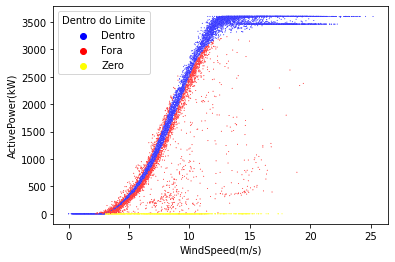

In [ ]:
cores = {'Dentro':'blue','Fora':'red','Zero':'yellow'}
graf = sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)', hue='Dentro do Limite', s=1, palette=cores)